**SVM WHITE BLOOD CELLS CLASSIFICATION ALGORITHM**



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
from os import listdir
import cv2
import glob
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from skimage.io import imread,imshow
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

In [ ]:
data = []
folder_dir = "drive/My Drive/Raabin - WBC/crop_dataset/"
count = 0
for wbc in os.listdir(folder_dir):
    count=0
    for images in os.listdir(folder_dir+"/"+wbc):
        data.append([folder_dir+"/"+wbc+"/"+images,wbc])
data1 = pd.DataFrame(data,columns=['images','Category'])
data1.head()

,images,Category
0,drive/My Drive/Raabin - WBC/crop_dataset//neut...,neutrophil
1,drive/My Drive/Raabin - WBC/crop_dataset//neut...,neutrophil
2,drive/My Drive/Raabin - WBC/crop_dataset//neut...,neutrophil
3,drive/My Drive/Raabin - WBC/crop_dataset//neut...,neutrophil
4,drive/My Drive/Raabin - WBC/crop_dataset//neut...,neutrophil


In [ ]:
from progressbar import ProgressBar
pbar = ProgressBar()

In [ ]:
data = []
lables = []
c = 0 ## to see the progress
for image in pbar(data1['images']):

    lables.append(data1['Category'][c])

    img = cv2.imread(image)
    data.append(img.flatten())
    c=c+1

100% (60 of 60) |########################| Elapsed Time: 0:00:20 Time:  0:00:20


In [ ]:
data = np.load("drive/My Drive/Raabin - WBC/data.npy")
lables = np.load("drive/My Drive/Raabin - WBC/lable.npy")

data = np.array([i.flatten() for i in data])


In [ ]:
# encode the labels as integer
data = np.array(data)
lables = np.array(lables)
lables_df = pd.DataFrame(np.unique(lables))
le = LabelEncoder()
lables = le.fit_transform(lables)

In [ ]:
(trainX, testX, trainY, testY ) = train_test_split(data, lables, test_size= 0.25)
scaler = StandardScaler()
X_train = scaler.fit_transform(trainX)
X_test = scaler.transform(testX)

In [ ]:
from sklearn.model_selection import train_test_split

model=svm.SVC(C=10**10)
model.fit(trainX,trainY)
model.score(testX,testY)

0.9558929862617498

In [ ]:
print(classification_report(testY, model.predict(testX), target_names=le.classes_))

              precision    recall  f1-score   support

  eosinophil       0.98      0.94      0.96       379
  lymphocyte       0.94      0.97      0.95       287
    monocyte       0.94      0.93      0.94       342
  neutrophil       0.95      0.99      0.97       375

    accuracy                           0.96      1383
   macro avg       0.96      0.96      0.96      1383
weighted avg       0.96      0.96      0.96      1383



In [ ]:
print(classification_report(trainY, model.predict(trainX), target_names=le.classes_))

              precision    recall  f1-score   support

  eosinophil       1.00      1.00      1.00      1116
  lymphocyte       1.00      1.00      1.00       891
    monocyte       1.00      1.00      1.00      1016
  neutrophil       1.00      1.00      1.00      1124

    accuracy                           1.00      4147
   macro avg       1.00      1.00      1.00      4147
weighted avg       1.00      1.00      1.00      4147



Accuracy: 0.96
['eosinophil' 'monocyte' 'eosinophil' ... 'eosinophil' 'lymphocyte'
 'neutrophil']


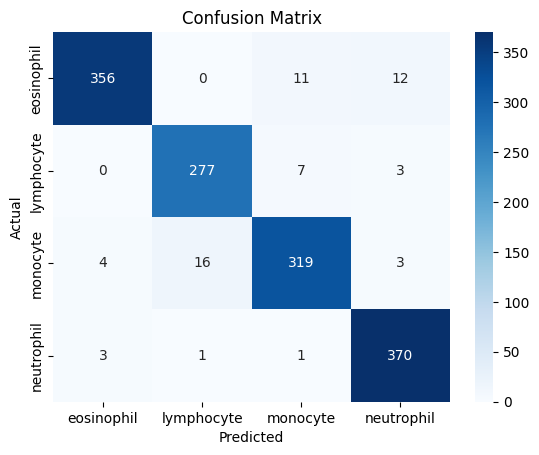

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
y_pred = model.predict(testX)
# Evaluate accuracy
accuracy = accuracy_score(testY, y_pred)
print(f"Accuracy: {accuracy:.2f}")
y_pred = le.inverse_transform(y_pred)
print(y_pred)

# Create confusion matrix
conf_mat = confusion_matrix(le.inverse_transform(testY),y_pred)

# Plot confusion matrix using seaborn
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()